In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re

In [2]:
train = pd.read_csv('train_tweet.csv')
test = pd.read_csv('test_tweets.csv')
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


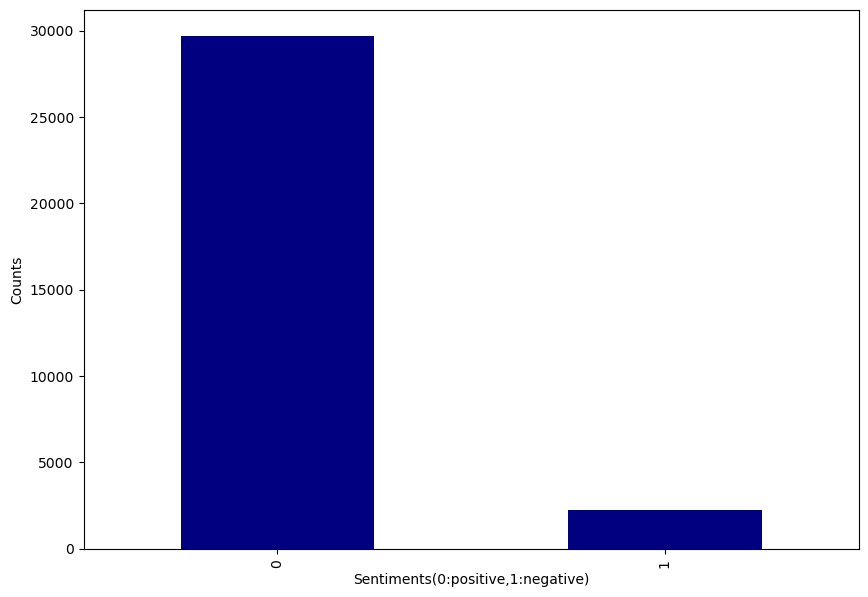

In [3]:
train['label'].value_counts().plot.bar(color = 'navy', figsize = (10, 7))
plt.xlabel('Sentiments(0:positive,1:negative)')
plt.ylabel('Counts')
plt.show()

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(train.tweet)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])


In [5]:
# tokenizing the words present in the training set
tokenized_tweet = train['tweet'].apply(lambda x: x.split()) 

In [6]:
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

train_corpus = []

for i in range(0, 31962):
  review = re.sub('[^a-zA-Z]', ' ', train['tweet'][i])
  review = review.lower()
  review = review.split()

  ps = PorterStemmer()
  # stemming
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  
  # joining the reviews sentences
  review = ' '.join(review)
  train_corpus.append(review)

test_corpus = []

for i in range(0, 17197):
  review = re.sub('[^a-zA-Z]', ' ', test['tweet'][i])
  review = review.lower()
  review = review.split()
  
  # stemming
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  
  # joining them back with space
  review = ' '.join(review)
  test_corpus.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abhin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
# creating bag of words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
X = cv.fit_transform(train_corpus).toarray()
X_test = cv.fit_transform(test_corpus).toarray()
y = train.iloc[:, 1]


In [8]:
# splitting the training data into train and valid sets
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.3, random_state = 0)

# standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_valid = sc.transform(x_valid)
X_test = sc.transform(X_test)

In [9]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

print("Training Accuracy :", rfc.score(x_train, y_train))
print("Validation Accuracy :", rfc.score(x_valid, y_valid))

Training Accuracy : 0.9993295490099674
Validation Accuracy : 0.9577641047033059


In [10]:
pred = rfc.predict(x_valid)
from sklearn.metrics import classification_report
print(classification_report(y_valid,pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      8954
           1       0.73      0.57      0.64       635

    accuracy                           0.96      9589
   macro avg       0.85      0.78      0.81      9589
weighted avg       0.95      0.96      0.96      9589

